<a href="https://colab.research.google.com/github/AviWilbur/AviWilbur-ML_Housing_Prices/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

machine learning techniques to two different datasets: one for predicting customer churn and another related to housing prices in Paris. The project involves data preprocessing steps such as handling missing values, encoding categorical variables, and scaling features. It utilizes various machine learning models, including Random Forest, XGBoost, and neural networks, to build predictive models. Additionally, the project includes hyperparameter tuning using GridSearchCV and evaluates model performance using metrics like precision, recall, and F1-score. The goal is to optimize the models for accurate predictions in both classification and regression tasks. ​

In [ ]:
# א1
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, recall_score,f1_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge







In [ ]:
from google.colab import files
classification = files.upload()

from google.colab import files
regression = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (2).csv


Saving ParisHousing1.csv to ParisHousing1 (2).csv


In [ ]:
# א2
# Load the first dataset into a DataFrame
ds1 = pd.read_csv("Bank Customer Churn Prediction.csv")

ds2 = pd.read_csv("ParisHousing1.csv")





X1 = ds1.drop("churn", axis=1)  # X contains all columns except "churn"
y1 = ds1["churn"]




X2 = ds2.drop("price", axis=1)  # X contains all columns except "churn"
y2 = ds2["price"]





In [ ]:
# 3
def preliminary_processing(X, y, z):
    # Step 1: Check for missing values and fill them
    numeric_features = X.select_dtypes(include=['number']).columns
    categorical_features = X.select_dtypes(exclude=['number']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Step 2: Remove categorical columns with more than 4 categories
    for col in categorical_features:
        if X[col].nunique() > 4:
            X.drop(col, axis=1, inplace=True)

    # Step 3: Convert categorical variables with 4 categories or fewer into dummy variables
    X_processed = preprocessor.fit_transform(X)

    # Step 4: Normalize the entire data (both numerical and one-hot encoded categorical features)
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X_processed)






    if z == 1:
                # Display/print class frequencies
        class_counts = y.value_counts()
        print("Class Frequencies:")
        print(class_counts)

        # Create and display a bar graph of class frequencies
        plt.figure(figsize=(8, 6))
        class_counts.plot(kind='bar', color='skyblue')
        plt.title('Class Frequencies')
        plt.xlabel('Classes')
        plt.ylabel('Frequency')
        plt.xticks(rotation=0)
        plt.show()
        # Step 4: Balance classes if needed (less than 25% in one category)
        minority_class = class_counts.idxmin()
        majority_class = class_counts.idxmax()

        if class_counts.min() / class_counts.max() < 0.25:
            minority_samples = X_processed[y == minority_class]
            majority_samples = X_processed[y == majority_class]

            # Resample minority class to match the majority class
            minority_samples_resampled = resample(minority_samples,
                                                  n_samples=class_counts[majority_class],
                                                  random_state=42)

            # Combine minority and majority samples
            X_processed_balanced = pd.concat([majority_samples, minority_samples_resampled])
            y_balanced = pd.concat([y[y == majority_class], y[y == minority_class]])

            X_train, X_test, y_train, y_test = train_test_split(X_processed_balanced, y_balanced,
                                                                test_size=0.2)

            return X_train, X_test, y_train, y_test


    X_train, X_test, y_train, y_test = train_test_split(X_processed, y,
                                                        test_size=0.2)

    return X_train, X_test, y_train, y_test

Class Frequencies:
0    7963
1    2037
Name: churn, dtype: int64


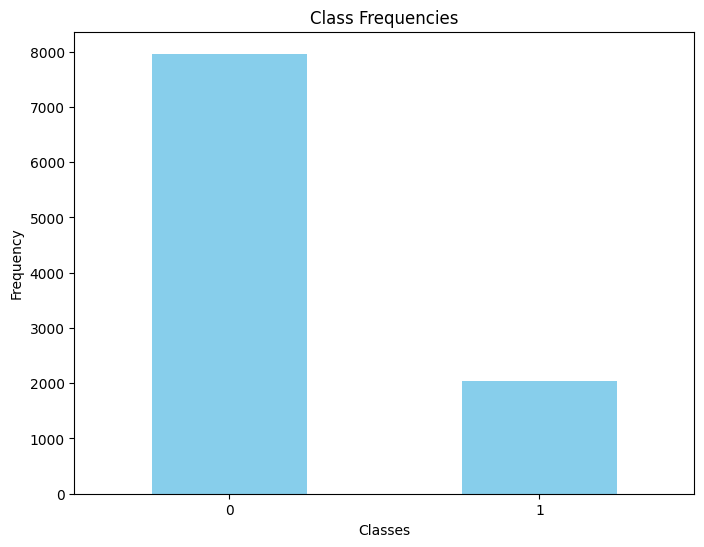

In [ ]:
X1_train, X1_test, y1_train, y1_test = preliminary_processing(X1, y1,1)


imbalanced data: since one class is much more frequent than the other imbalancing is required, I have chosen the resampling technique since it artificailly adds to the minority class to create a balanced dataset to prevent a bias towards the majority class.

In [ ]:
#4

# Define hyperparameter grids for Random Forest and XGBoost
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Example values, adjust as needed
    'max_depth': [None, 10, 20],      # Example values, adjust as needed
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],  # Example values, adjust as needed
    'max_depth': [3, 4, 5],           # Example values, adjust as needed
}

# Create GridSearchCV objects for Random Forest and XGBoost
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=5)

# Fit the GridSearchCV objects on the training set
rf_grid_search.fit(X1_train, y1_train)
xgb_grid_search.fit(X1_train, y1_train)

# Retrieve the best hyperparameters for each model
best_rf_params = rf_grid_search.best_params_
best_xgb_params = xgb_grid_search.best_params_

# Now, you have the best hyperparameters for Random Forest and XGBoost models

print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

print("\nBest Hyperparameters for XGBoost:")
print(xgb_grid_search.best_params_)






Best Hyperparameters for Random Forest:
{'max_depth': 10, 'n_estimators': 100}

Best Hyperparameters for XGBoost:
{'max_depth': 3, 'n_estimators': 100}


In [ ]:
# 5



# # Split the remaining data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X1_train, y1_train, test_size=0.5, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=8))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 64
epochs = 100  # Experiment with the number of epochs

# Define EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation
history = model.fit(
    X1_train,
    y1_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X1_test, y1_test)

print(model.summary())

# Print the test accuracy
print("Test Accuracy:", test_accuracy)



Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 0.4588 - accuracy: 0.8010 - val_loss: 0.3849 - val_accuracy: 0.8482
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8506 - val_loss: 0.3494 - val_accuracy: 0.8602
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8569 - val_loss: 0.3398 - val_accuracy: 0.8633
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8561 - val_loss: 0.3344 - val_accuracy: 0.8635
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8595 - val_loss: 0.3322 - val_accuracy: 0.8655
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.8587 - val_loss: 0.3281 - val_accuracy: 0.8662
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8620 - val_loss: 0.3264 - val_accuracy: 0.8675

The neural network has 5 layers including the output layer with the sigmoid activation. The network has 12033 parameters. I have given these input parameters after expirementing with them and found that these inputs gave the best accuracy for the data.

In [ ]:
# 6

# Make predictions using the Random Forest model
rf_train_predictions = rf_grid_search.predict(X1_train)
rf_test_predictions = rf_grid_search.predict(X1_test)

# Make predictions using the XGBoost model
xgb_train_predictions = xgb_grid_search.predict(X1_train)
xgb_test_predictions = xgb_grid_search.predict(X1_test)

# Make predictions using the Neural Network model
nn_train_probabilities = model.predict(X1_train)
nn_test_probabilities = model.predict(X1_test)

# Threshold the predicted probabilities to get predicted classes
nn_train_predictions = (nn_train_probabilities > 0.5).astype(int)
nn_test_predictions = (nn_test_probabilities > 0.5).astype(int)

# Print classification reports for Random Forest predictions
print("Classification Report for Random Forest - Training Set:")
print(classification_report(y1_train, rf_train_predictions))

print("\nClassification Report for Random Forest - Test Set:")
print(classification_report(y1_test, rf_test_predictions))

# Print classification reports for XGBoost predictions
print("\nClassification Report for XGBoost - Training Set:")
print(classification_report(y1_train, xgb_train_predictions))

print("\nClassification Report for XGBoost - Test Set:")
print(classification_report(y1_test, xgb_test_predictions))

# Print classification reports for Neural Network predictions
print("\nClassification Report for Neural Network - Training Set:")
print(classification_report(y1_train, nn_train_predictions))

print("\nClassification Report for Neural Network - Test Set:")
print(classification_report(y1_test, nn_test_predictions))


63/63 [==============================] - 0s 1ms/step
Classification Report for Random Forest - Training Set:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6374
           1       0.90      0.50      0.64      1626

    accuracy                           0.89      8000
   macro avg       0.89      0.74      0.79      8000
weighted avg       0.89      0.89      0.87      8000


Classification Report for Random Forest - Test Set:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1589
           1       0.80      0.38      0.51       411

    accuracy                           0.85      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.85      0.85      0.83      2000


Classification Report for XGBoost - Training Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6374
           1       0.83 

6 ב . all 3 models gave similar score and the training set was higher on all 3 than the test set so there might be a little over-fitting but based on the accuracy the random forest slightly has the best accuracy.

6ג . all 3 of the models did not perform very well when it comes to predicting correctly the class 1 which is the my predecting question whether or not an employee churns or not. but looking at the f1 score, XGBoost had the best score. the f1 score considers both recall and pricision and gives a balance assessment of the performence and is most relevent since a higher F1 score indicates a better balance between correctly identifying positive cases and minimizing false positives and false negatives.

In [ ]:
# 7

# Split the data into training (80%) and the rest (20%)
#X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split the remaining data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(units=128, activation='LeakyReLU', input_dim=8))
model.add(Dense(units=64, activation='LeakyReLU'))
model.add(Dense(units=32, activation='LeakyReLU'))
model.add(Dense(units=16, activation='LeakyReLU'))
# model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 64
epochs = 100  # Experiment with the number of epochs

# Define EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation
history = model.fit(
    X1_train,
    y1_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X1_test, y1_test)



# print(model.summary())

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

y1_pred_prob = model.predict(X1_test)
y1_pred = (y1_pred_prob >= 0.5).astype(int)

precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
train_predictions = model.predict(X1_train)
train_classifications = (train_predictions >= 0.5).astype(int)

# Classify test set predictions

print("Predictions on the training set:")
print(train_classifications)

# Predictions on the test set
test_predictions = model.predict(X1_test)
test_classifications = (test_predictions >= 0.5).astype(int)
print("\nPredictions on the test set:")
print(test_classifications)



Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.8177 - val_loss: 0.3988 - val_accuracy: 0.8340
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8419 - val_loss: 0.3731 - val_accuracy: 0.8350
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8543 - val_loss: 0.3557 - val_accuracy: 0.8390
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8543 - val_loss: 0.3610 - val_accuracy: 0.8490
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8574 - val_loss: 0.3566 - val_accuracy: 0.8480
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8568 - val_loss: 0.3587 - val_accuracy: 0.8530
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8570 - val_loss: 0.3721 - val_accuracy: 0.8090

on question 5 i Have already experemented with the network trying to get the best score by adding and removing layers and playing with the parameters but here i tried a diffrent activation methods and found a better one that improves the network score of accuracy pricision recall and f1.

In [ ]:
# 9
X2_train, X2_test, y2_train, y2_test = preliminary_processing(X2, y2,2)

In [ ]:
# 10

model = LinearRegression()  # Replace with your desired model
model.fit(X2_train, y2_train)

y2_train_pred = model.predict(X2_train)

# Perform predictions on the test set
y2_test_pred = model.predict(X2_test)

# Assuming you have already trained your model and made predictions
# 'y2_train_pred' contains predictions on the training set
# 'y2_test_pred' contains predictions on the test set

# Calculate R-squared (R^2) for training and test sets
r2_train = r2_score(y2_train, y2_train_pred)
r2_test = r2_score(y2_test, y2_test_pred)

# Calculate Root Mean Square Error (RMSE) for training and test sets
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

# Calculate Mean Absolute Error (MAE) for training and test sets
mae_train = mean_absolute_error(y2_train, y2_train_pred)
mae_test = mean_absolute_error(y2_test, y2_test_pred)

# Calculate Mean Absolute Percentage Error (MAPE) for training and test sets
mape_train = np.mean(np.abs((y2_train - y2_train_pred) / y2_train)) * 100
mape_test = np.mean(np.abs((y2_test - y2_test_pred) / y2_test)) * 100

# Print the evaluation metrics
print("R-squared (R^2) - Training Set:", r2_train)
print("R-squared (R^2) - Test Set:", r2_test)
print("Root Mean Square Error (RMSE) - Training Set:", rmse_train)
print("Root Mean Square Error (RMSE) - Test Set:", rmse_test)
print("Mean Absolute Error (MAE) - Training Set:", mae_train)
print("Mean Absolute Error (MAE) - Test Set:", mae_test)
print("Mean Absolute Percentage Error (MAPE) - Training Set:", mape_train)
print("Mean Absolute Percentage Error (MAPE) - Test Set:", mape_test)


R-squared (R^2) - Training Set: 0.9999995615146176
R-squared (R^2) - Test Set: 0.9999995687063579
Root Mean Square Error (RMSE) - Training Set: 1909.4481826505387
Root Mean Square Error (RMSE) - Test Set: 1872.9733880054828
Mean Absolute Error (MAE) - Training Set: 1485.1395150759918
Mean Absolute Error (MAE) - Test Set: 1474.947410341857
Mean Absolute Percentage Error (MAPE) - Training Set: 0.10353261481587009
Mean Absolute Percentage Error (MAPE) - Test Set: 0.09404217176921102


In [ ]:
# Assuming you have already loaded and split your dataset into X2_train, X2_test, y2_train, and y2_test

# Define the range of polynomial degrees (d values)
d_values = [2, 3, 4]  # You can extend this list as needed

best_result = None
best_model = None  # Initialize a variable to store the best model
poly_X2_train = None
poly_X2_test = None

# Iterate over each polynomial degree (d)
for d in d_values:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    poly_X_train = poly.fit_transform(X2_train)
    poly_X_test = poly.transform(X2_test)

    # Initialize Lasso and Ridge models
    lasso = Lasso()
    ridge = Ridge()

    # Define regularization strength values to search
    alphas = np.logspace(-6, 6, 13)

    # Perform GridSearchCV to find the best alpha value for Lasso
    lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alphas}, cv=5)
    lasso_cv.fit(poly_X_train, y2_train)
    best_lasso_alpha = lasso_cv.best_params_['alpha']

    # Perform GridSearchCV to find the best alpha value for Ridge
    ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5)
    ridge_cv.fit(poly_X_train, y2_train)
    best_ridge_alpha = ridge_cv.best_params_['alpha']

    # Determine the best model based on cross-validation
    if lasso_cv.best_score_ > ridge_cv.best_score_:
        best_model = lasso_cv.best_estimator_  # Store the best Lasso model
        poly_X2_train = poly_X_train
        poly_X2_test = poly_X_test
        best_alpha = best_lasso_alpha
    else:
        best_model = ridge_cv.best_estimator_  # Store the best Ridge model
        poly_X2_train = poly_X_train
        poly_X2_test = poly_X_test
        best_alpha = best_ridge_alpha

    # Update the best result if it's the first iteration or if this result is better
    if best_result is None or lasso_cv.best_score_ > best_result['score']:
        best_result = {
            'Degree (d)': d,
            'Best Model (Lasso/Ridge)': best_model,
            'Best Alpha': best_alpha,
            'score': lasso_cv.best_score_
        }

# Print the best transformation degree, best model, and best alpha
print("Best Transformation Degree (d):", best_result['Degree (d)'])
print("Best Model (Lasso/Ridge):", best_result['Best Model (Lasso/Ridge)'])
print("Best Alpha:", best_result['Best Alpha'])

Best Transformation Degree (d): 2
Best Model (Lasso/Ridge): Lasso(alpha=10.0)
Best Alpha: 10.0


# 12
The problam that can occur is it can result in a high-dimensional feature space, making the model more sensitive to noise and irrelevant information.
to fix this problem we use techniques like Lasso it shrinks less important features and reduces the dimensionality problem.

Lasso - uses L1 regularization, which adds penalties to parameters that are not contributing to the prediction, effectively reducing the number of parameters used in prediction.
should be used-  when dealing with a large number of parameters and there is concern about too many irrelevant parameters.
Ridge - uses L2 regularization, which adds nearly equal penalties to all parameters, shrinking their values uniformly.
should be used - when there is noise in the data and the aim is to reduce large parameter values to improve model generalization.

In [ ]:
# 13
# Assuming you have the best model from section 11 stored in 'best_model'
# Make predictions on the training and test sets
y_train_pred = best_model.predict(poly_X2_train)
y_test_pred = best_model.predict( poly_X2_test)

# Import necessary libraries for evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared (R^2)
r2_train = r2_score(y2_train, y_train_pred)
r2_test = r2_score(y2_test, y_test_pred)

# Calculate Root Mean Square Error (RMSE)
rmse_train = mean_squared_error(y2_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y2_test, y_test_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y2_train, y_train_pred)
mae_test = mean_absolute_error(y2_test, y_test_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y2_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y2_test, y_test_pred)

# Print the evaluation metrics
print("R-squared (R^2) - Training Set:", r2_train)
print("R-squared (R^2) - Test Set:", r2_test)
print("Root Mean Square Error (RMSE) - Training Set:", rmse_train)
print("Root Mean Square Error (RMSE) - Test Set:", rmse_test)
print("Mean Absolute Error (MAE) - Training Set:", mae_train)
print("Mean Absolute Error (MAE) - Test Set:", mae_test)
print("Mean Absolute Percentage Error (MAPE) - Training Set:", mape_train)
print("Mean Absolute Percentage Error (MAPE) - Test Set:", mape_test)


R-squared (R^2) - Training Set: 0.9999995584631569
R-squared (R^2) - Test Set: 0.9999995656114722
Root Mean Square Error (RMSE) - Training Set: 1916.0806776722243
Root Mean Square Error (RMSE) - Test Set: 1879.6814356316122
Mean Absolute Error (MAE) - Training Set: 1492.9514162567039
Mean Absolute Error (MAE) - Test Set: 1478.6091082970852
Mean Absolute Percentage Error (MAPE) - Training Set: 0.10480350878148387
Mean Absolute Percentage Error (MAPE) - Test Set: 0.09424987176058297


In [ ]:
# 14
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# Define a dictionary of models and their respective hyperparameter grids
models = {
    'XGBRegressor': (XGBRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
    }),
    # 'CatBoostRegressor': (CatBoostRegressor(), {
    #     'iterations': [100, 200, 300],
    #     'learning_rate': [0.01, 0.1, 0.2],
    # }),
    'LGBMRegressor': (LGBMRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
    }),
    # 'RandomForestRegressor': (RandomForestRegressor(), {
    #     'n_estimators': [100, 200, 300],
    #     'max_depth': [None, 10, 20],
    # })
}

best_model = None
best_params = {}
best_score = -1

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X1_train, y1_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = model_name
        best_params = grid_search.best_params_

# Print the best model and its parameters
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] Start training from score 0.203250
Best Model: LGBMRegressor
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 300}


In [ ]:
# 15
# Create the selected model using the best hyperparameters
selected_model = models[best_model][0]
selected_model.set_params(**best_params)

# Fit the selected model on the training data
selected_model.fit(X1_train, y1_train)

# Make predictions on the training and test sets
y1_train_pred = selected_model.predict(X1_train)
y1_test_pred = selected_model.predict(X1_test)

# Calculate R-squared (R^2)
r2_train = r2_score(y1_train, y1_train_pred)
r2_test = r2_score(y1_test, y1_test_pred)

# Calculate Root Mean Square Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_train_pred))
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_test_pred))

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y1_train, y1_train_pred)
mae_test = mean_absolute_error(y1_test, y1_test_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((y1_train - y1_train_pred) / y1_train)) * 100
mape_test = np.mean(np.abs((y1_test - y1_test_pred) / y1_test)) * 100

# Print the evaluation metrics
print(f"Training R^2: {r2_train}")
print(f"Test R^2: {r2_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Training MAPE: {mape_train}%")
print(f"Test MAPE: {mape_test}%")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] Start training from score 0.203250
Training R^2: 0.4307534561979889
Test R^2: 0.30576540930712914
Training RMSE: 0.30361730039988966
Test RMSE: 0.3366712165656241
Training MAE: 0.20360965994445165
Test MAE: 0.22850266834731758
Training MAPE: inf%
Test MAPE: inf%


In [ ]:
import os
import cv2
import numpy as np
import zipfile

# Path to the uploaded zip file
uploaded_zip_file = '/content/drive/MyDrive/archive (2).zip'

# Define the paths to the folders containing your image data
shells_folder = 'Shells'
pebbles_folder = 'Pebbles'

# Create directories to extract the files if they don't exist
os.makedirs(shells_folder, exist_ok=True)
os.makedirs(pebbles_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(uploaded_zip_file, 'r') as zip_ref:
    zip_ref.extractall('.')

# Verify if the folders exist
print("Shells Folder Exists:", os.path.exists(shells_folder))
print("Pebbles Folder Exists:", os.path.exists(pebbles_folder))

# Load and preprocess image data
X = []
y = []

# Load shells images and assign label 0
for filename in os.listdir(shells_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(shells_folder, filename)
        image = cv2.imread(img_path)  # Load the image
        image = cv2.resize(image, (224, 224))  # Resize to a consistent size
        X.append(image)
        y.append(0)  # Label for shells

# Load pebbles images and assign label 1
for filename in os.listdir(pebbles_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(pebbles_folder, filename)
        image = cv2.imread(img_path)  # Load the image
        image = cv2.resize(image, (224, 224))  # Resize to a consistent size
        X.append(image)
        y.append(1)  # Label for pebbles

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

print(len(X))  # Length of X, the image data
print(len(y))

# Now, X contains your image data, and y contains the corresponding labels.





Shells Folder Exists: True
Pebbles Folder Exists: True
4244
4244
